# Data Understanding

In [29]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals
# The simplest possible classifier is the nearest neighbor: given a new observation X_test, find in the training set 
#(i.e. the data used to train the estimator) the observation(s) with the closest feature vector.
# This script illustrates the usage of kNN. 

# Import necessary libraries and specify that graphs should be plotted inline.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # Learn more about matplotlib.colors here https://matplotlib.org/3.1.1/api/colors_api.html
import pandas as pd
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display  import Image
import graphviz
import matplotlib.pyplot as plt

np.random.seed(42) # Ensure reproducability
################################################## Load Data ##################################################
#import data from the spreadsheet
df = pd.read_csv("noshow_data.csv")
df_orig = df
df.head(5)
print('Total Number of Appointments: ' + str(df['AppointmentID'].count()))
print('')
print(df.nunique())
print('')
print(df.dtypes)
print('\nAny NA?')
print(df.isna().sum())

Total Number of Appointments: 110527

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Any NA?
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism 

In [30]:
# Retrieving Attributes
X = df.iloc[:, :13] #the columns with the features 0-12

# Retriving Target Variable
y = df.iloc[:, 13] # grab no-show column


Variable: Age
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99      

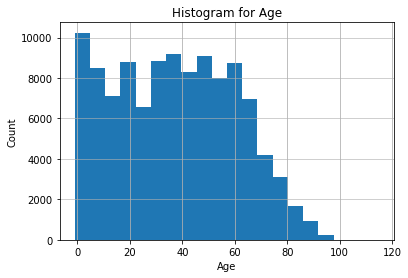

Variable: Scholarship
count    110527.000000
mean          0.098266
std           0.297675
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Scholarship, dtype: float64
0    99666
1    10861
Name: Scholarship, dtype: int64
0    0.901734
1    0.098266
Name: Scholarship, dtype: float64


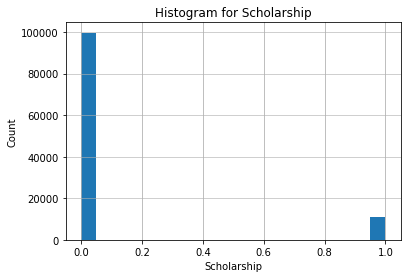

Variable: Hipertension
count    110527.000000
mean          0.197246
std           0.397921
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Hipertension, dtype: float64
0    88726
1    21801
Name: Hipertension, dtype: int64
0    0.802754
1    0.197246
Name: Hipertension, dtype: float64


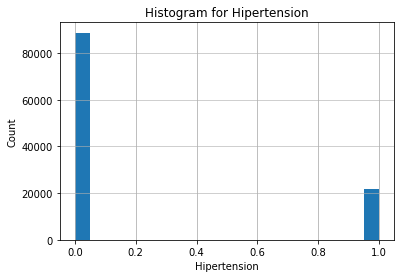

Variable: Diabetes
count    110527.000000
mean          0.071865
std           0.258265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Diabetes, dtype: float64
0    102584
1      7943
Name: Diabetes, dtype: int64
0    0.928135
1    0.071865
Name: Diabetes, dtype: float64


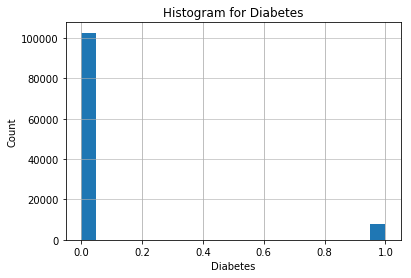

Variable: Alcoholism
count    110527.000000
mean          0.030400
std           0.171686
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Alcoholism, dtype: float64
0    107167
1      3360
Name: Alcoholism, dtype: int64
0    0.9696
1    0.0304
Name: Alcoholism, dtype: float64


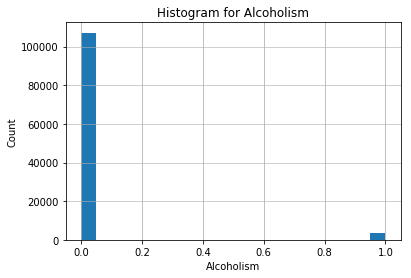

Variable: Handcap
count    110527.000000
mean          0.022248
std           0.161543
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Handcap, dtype: float64
0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64
0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: Handcap, dtype: float64


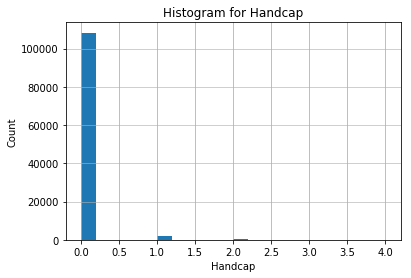

Variable: SMS_received
count    110527.000000
mean          0.321026
std           0.466873
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: SMS_received, dtype: float64
0    75045
1    35482
Name: SMS_received, dtype: int64
0    0.678974
1    0.321026
Name: SMS_received, dtype: float64


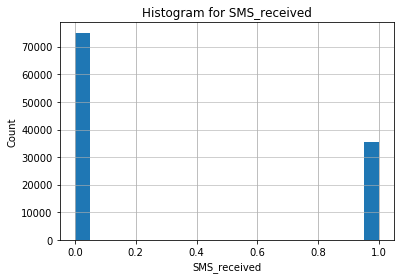

In [5]:
# Exploring Numeric and Binary Variables
# min, max, mean, std dev for all numeric variables
num_features = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
for i in num_features:
    print('Variable: ' + i)
    print(df[i].describe())
    s=pd.Series(df[i])   # shows the counts of each value
    print(s.value_counts())
    print(s.value_counts(normalize=True))
    dist = df[i]
    dist.hist(grid=True, bins=20)
    plt.title('Histogram for ' + str(i))
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.grid(axis='y', alpha=0.75) 
    plt.show()

Variable: Gender
F    71840
M    38687
Name: Gender, dtype: int64
F    0.649977
M    0.350023
Name: Gender, dtype: float64

Variable: Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                 

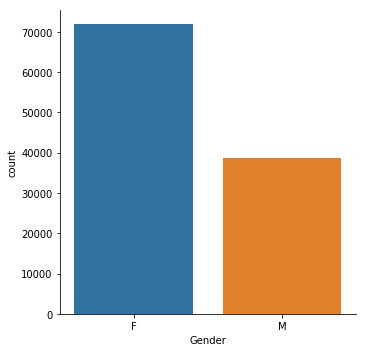

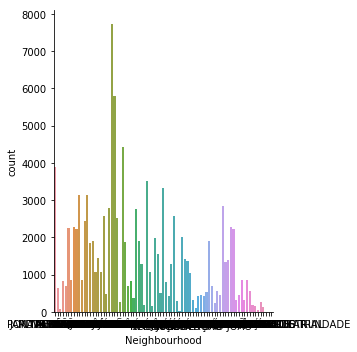

In [6]:
# Exploring Categorical Variables
cat_variables = ['Gender', 'Neighbourhood']

for i in cat_variables:
    print('Variable: ' + i)
    s=pd.Series(df[i])   # shows the counts and percents of each value
    print(s.value_counts())
    print(s.value_counts(normalize=True))
    sns.catplot(x=i, kind="count", data=df)
    print()


Variable: No-show
No     88208
Yes    22319
Name: No-show, dtype: int64
No     0.798067
Yes    0.201933
Name: No-show, dtype: float64


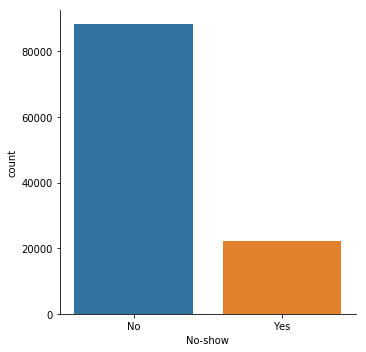

In [7]:
# Exploring Target Variable
print('Variable: No-show')
s=pd.Series(df['No-show'])   # shows the counts and percents of each value
print(s.value_counts())
print(s.value_counts(normalize=True))
sns.catplot(x='No-show', kind="count", data=df)


In [24]:
# Looking at More Data Attributes to understand how Age Matters
q1 = df.groupby(by=['Age', 'SMS_received']).count()
q2 = df.groupby(by=['Age', 'No-show']).count()
q3 = df.groupby(by=['Age', 'SMS_received', 'No-show']).count()
q4 = df.groupby(by=['Age', 'Alcoholism']).count()
q6 = df.groupby(by=['Scholarship', 'No-show']).count()
q7 = df.groupby(by=['Hipertension', 'No-show']).count()
q8 = df.groupby(by=['Diabetes', 'No-show']).count()
q9 = df.groupby(by=['Alcoholism', 'No-show']).count()
q10 = df.groupby(by=['Handcap', 'No-show']).count()
q11 = df.groupby(by=['SMS_received', 'No-show']).count()
q12 = df.groupby(by=['Gender', 'No-show']).count()
q12

PatientId  AppointmentID  ScheduledDay  AppointmentDay    Age  \
Gender No-show                                                                  
F      No           57246          57246         57246           57246  57246   
       Yes          14594          14594         14594           14594  14594   
M      No           30962          30962         30962           30962  30962   
       Yes           7725           7725          7725            7725   7725   

                Neighbourhood  Scholarship  Hipertension  Diabetes  \
Gender No-show                                                       
F      No               57246        57246         57246     57246   
       Yes              14594        14594         14594     14594   
M      No               30962        30962         30962     30962   
       Yes               7725         7725          7725      7725   

                Alcoholism  Handcap  SMS_received  
Gender No-show                                     
F      No            57246    57246         57246  
       Yes           14594    14594         14594  
M      No            30962    30962         30962  
       Yes            7725     7725          7725

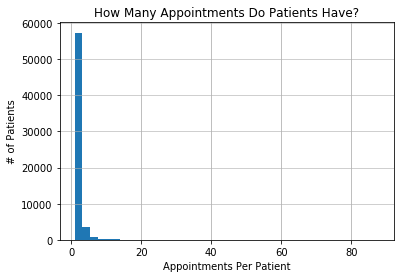

count    62299.000000
mean         1.774138
std          1.770324
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         88.000000
Name: AppointmentID, dtype: float64

In [11]:
# Examining Patient and Appointments
q5 = df.groupby(by=['PatientId']).count()

dist = q5['AppointmentID']
dist.hist(grid=True, bins=40)
plt.title('How Many Appointments Do Patients Have?')
plt.xlabel('Appointments Per Patient')
plt.ylabel('# of Patients')
plt.grid(axis='y', alpha=0.75) 
plt.show()

q5['AppointmentID'].describe()

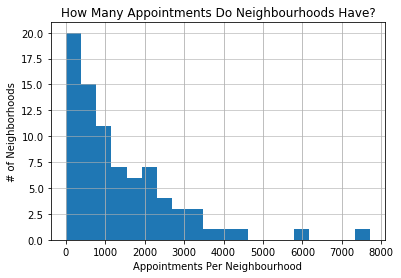

count      81.000000
mean     1364.530864
std      1369.199539
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: AppointmentID, dtype: float64

In [12]:
# Examining Neighbourhood and Appointments
q5 = df.groupby(by=['Neighbourhood']).count()

dist = q5['AppointmentID']
dist.hist(grid=True, bins=20)
plt.title('How Many Appointments Do Neighbourhoods Have?')
plt.xlabel('Appointments Per Neighbourhood')
plt.ylabel('# of Neighborhoods')
plt.grid(axis='y', alpha=0.75) 
plt.show()

q5['AppointmentID'].describe()

#q5.sort_values(['AppointmentID'], ascending=[False])

In [31]:
# Checking if data inconsistencies exist
df_check = df.query('ScheduledDay > AppointmentDay')

In [32]:
# Checking for Multicollinearity
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1,0.00404,-0.00414,-0.00288,-0.00644,0.00161,0.011,-0.00792,-0.00975
AppointmentID,0.00404,1,-0.0191,0.0226,0.0128,0.0226,0.0329,0.0141,-0.257
Age,-0.00414,-0.0191,1,-0.0925,0.505,0.292,0.0958,0.078,0.0126
Scholarship,-0.00288,0.0226,-0.0925,1,-0.0197,-0.0249,0.035,-0.00859,0.00119
Hipertension,-0.00644,0.0128,0.505,-0.0197,1,0.433,0.088,0.0801,-0.00627
Diabetes,0.00161,0.0226,0.292,-0.0249,0.433,1,0.0185,0.0575,-0.0146
Alcoholism,0.011,0.0329,0.0958,0.035,0.088,0.0185,1,0.00465,-0.0261
Handcap,-0.00792,0.0141,0.078,-0.00859,0.0801,0.0575,0.00465,1,-0.0242
SMS_received,-0.00975,-0.257,0.0126,0.00119,-0.00627,-0.0146,-0.0261,-0.0242,1


# Data Preparation

## Eliminating Incorrect Observations

In [33]:
# Eliminate observations with age below 0
df = df.loc[df['Age'] >= 0]
df.count()

# Eliminate observations with Handcap 2-4
df = df.loc[df['Handcap'] < 2]
df.count()

# Eliminate observations with Alcoholism = 1 where the Age is < 10
df = df.drop(df[(df['Age'] <10 ) & (df['Alcoholism'] == 1)].index)
df.count()

# Only keep the Date of the ScheduleDay and AppointmentDay
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay'] = df['AppointmentDay'].dt.date

# Keep observations where scheduled day happens before appointment day
df = df.query('ScheduledDay <  AppointmentDay')
df.head(5)
df.count()

PatientId         71834
AppointmentID     71834
Gender            71834
ScheduledDay      71834
AppointmentDay    71834
Age               71834
Neighbourhood     71834
Scholarship       71834
Hipertension      71834
Diabetes          71834
Alcoholism        71834
Handcap           71834
SMS_received      71834
No-show           71834
dtype: int64

# Feature Engineering

## Adding New Variables

In [34]:
# Calculating Days between ScheduledDay and AppointmentDay
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['Lead_Time'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days

df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Lead_Time
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No,2
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3
12,5.666548e+14,5634718,F,2016-04-28,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No,1
13,9.113946e+14,5636249,M,2016-04-28,2016-04-29,28,NOVA PALESTINA,0,0,0,0,0,0,No,1
14,9.988472e+13,5633951,F,2016-04-28,2016-04-29,54,NOVA PALESTINA,0,0,0,0,0,0,No,1
15,9.994839e+10,5620206,F,2016-04-26,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No,3


In [35]:
# Calculating Whether ScheduledDay Happened During Weekend or Weekday
# dt.weekday 0(Mon)-4(Fri) = Weekday, 5(Sat)-6(Sun) = Weekend

df['Scheduled_Weekday'] = np.where(df['ScheduledDay'].dt.weekday < 5, 1, 0)

df_check = df.groupby(by=['Scheduled_Weekday']).count()
df_check

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Lead_Time
Scheduled_Weekday,,,,,,,,,,,,,,,
0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
1,71818,71818,71818,71818,71818,71818,71818,71818,71818,71818,71818,71818,71818,71818,71818


In [36]:
# Calculating Which Day of the Week the Appointment Will Occur
# dt.weekday 0(Mon)-4(Fri) = Weekday, 5(Sat)-6(Sun) = Weekend

df['Appt_Mon'] = np.where(df['AppointmentDay'].dt.weekday == 0, 1, 0)
df['Appt_Tues'] = np.where(df['AppointmentDay'].dt.weekday == 1, 1, 0)
df['Appt_Weds'] = np.where(df['AppointmentDay'].dt.weekday == 2, 1, 0)
df['Appt_Thurs'] = np.where(df['AppointmentDay'].dt.weekday == 3, 1, 0)
df['Appt_Fri'] = np.where(df['AppointmentDay'].dt.weekday == 4, 1, 0)
df['Appt_Sat'] = np.where(df['AppointmentDay'].dt.weekday == 5, 1, 0)
df['Appt_Sun'] = np.where(df['AppointmentDay'].dt.weekday == 6, 1, 0)

In [38]:
# Calculate No Show Rate for Each Clinic Neighbourhood
df_neigh = df.groupby(by=['Neighbourhood', 'No-show'])[['No-show']].count()

from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

# df.to_sql('neigh', con=engine)
df_neigh = engine.execute("SELECT n.Neighbourhood, `No-show`, COUNT(*), Total FROM neigh n, (SELECT Neighbourhood, COUNT(*) as Total FROM neigh GROUP BY Neighbourhood) AS R1 WHERE R1.Neighbourhood = n.Neighbourhood GROUP BY n.Neighbourhood, `No-show`").fetchall()
df_neigh = pd.DataFrame(df_neigh, columns=['Neighbourhood', 'No-show', 'Count', 'Total'])
df_neigh.head(10)

df_neigh['Neigh_No-show_Percentage'] = df_neigh['Count']/df_neigh['Total']
df_neigh = df_neigh[df_neigh['No-show'] == 'Yes']
df_neigh = df_neigh[['Neighbourhood', 'Neigh_No-show_Percentage']]
df_neigh

OperationalError: (sqlite3.OperationalError) no such table: neigh
[SQL: SELECT n.Neighbourhood, `No-show`, COUNT(*), Total FROM neigh n, (SELECT Neighbourhood, COUNT(*) as Total FROM neigh GROUP BY Neighbourhood) AS R1 WHERE R1.Neighbourhood = n.Neighbourhood GROUP BY n.Neighbourhood, `No-show`]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [39]:
# Join Calculated Percentages to the original df
df_all  = pd.merge(df, df_neigh, how='inner', on=['Neighbourhood'])
df_all
df_all.columns

#df_all.count()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show_x',
       'Lead_Time', 'Scheduled_Weekday', 'Appt_Mon', 'Appt_Tues', 'Appt_Weds',
       'Appt_Thurs', 'Appt_Fri', 'Appt_Sat', 'Appt_Sun', 'No-show_y'],
      dtype='object')

In [41]:
X = df_all
X

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Lead_Time,Scheduled_Weekday,Appt_Mon,Appt_Tues,Appt_Weds,Appt_Thurs,Appt_Fri,Appt_Sat,Appt_Sun,No-show_y
0,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,...,2,1,0,0,0,0,1,0,0,456
1,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,...,2,1,0,0,0,0,1,0,0,136
2,4.542132e+13,5552934,F,2016-04-06,2016-04-29,68,REPÚBLICA,0,1,1,...,23,1,0,0,0,0,1,0,0,456
3,4.542132e+13,5552934,F,2016-04-06,2016-04-29,68,REPÚBLICA,0,1,1,...,23,1,0,0,0,0,1,0,0,136
4,7.886632e+13,5632739,F,2016-04-28,2016-04-29,8,REPÚBLICA,0,0,0,...,1,1,0,0,0,0,1,0,0,456
5,7.886632e+13,5632739,F,2016-04-28,2016-04-29,8,REPÚBLICA,0,0,0,...,1,1,0,0,0,0,1,0,0,136
6,2.395477e+10,5629428,F,2016-04-27,2016-04-29,14,REPÚBLICA,0,0,0,...,2,1,0,0,0,0,1,0,0,456
7,2.395477e+10,5629428,F,2016-04-27,2016-04-29,14,REPÚBLICA,0,0,0,...,2,1,0,0,0,0,1,0,0,136
8,4.954456e+12,5525973,F,2016-03-30,2016-04-29,73,REPÚBLICA,0,0,0,...,30,1,0,0,0,0,1,0,0,456
9,4.954456e+12,5525973,F,2016-03-30,2016-04-29,73,REPÚBLICA,0,0,0,...,30,1,0,0,0,0,1,0,0,136


## Encoding & Dummy Variables

### Encoding Gender and Neighbourhood

In [18]:
from sklearn.preprocessing import LabelEncoder
# Encode Gender
print("Categories for 'Gender' now:", df_all['Gender'].unique())
print("Number of Categories for 'Gender' now:", len(X['Gender'].unique()))

lab_encoder = LabelEncoder()
Gender_encoded = lab_encoder.fit_transform(X['Gender'])
print("\nCorresponding Encodings Display:")
print(Gender_encoded[:20])
print(lab_encoder.inverse_transform(Gender_encoded[:20]))
X['is_Male'] = Gender_encoded
X.head()

Categories for 'Gender' now: ['F' 'M']
Number of Categories for 'Gender' now: 2

Corresponding Encodings Display:
[0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0]
['F' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F' 'M' 'M' 'F' 'M' 'F' 'F' 'M' 'F' 'F'
 'M' 'F']


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Scheduled_Weekday,Appt_Mon,Appt_Tues,Appt_Weds,Appt_Thurs,Appt_Fri,Appt_Sat,Appt_Sun,Neigh_No-show_Percentage,is_Male
0,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,...,1,0,0,0,0,1,0,0,0.22973,0
1,4.542132e+13,5552934,F,2016-04-06,2016-04-29,68,REPÚBLICA,0,1,1,...,1,0,0,0,0,1,0,0,0.22973,0
2,7.886632e+13,5632739,F,2016-04-28,2016-04-29,8,REPÚBLICA,0,0,0,...,1,0,0,0,0,1,0,0,0.22973,0
3,2.395477e+10,5629428,F,2016-04-27,2016-04-29,14,REPÚBLICA,0,0,0,...,1,0,0,0,0,1,0,0,0.22973,0
4,4.954456e+12,5525973,F,2016-03-30,2016-04-29,73,REPÚBLICA,0,0,0,...,1,0,0,0,0,1,0,0,0.22973,0


In [19]:
# Lower the Number of Categories in Neighbourhood Using Pareto Rule
# 34 neighbourhoods cover 80% of the appointments
# Find the Top 34 Neighbourhoods, Change the remainder to 'Other'
X.to_sql('X', con=engine)
top_neigh = engine.execute("SELECT Neighbourhood, COUNT(*) FROM X GROUP BY Neighbourhood ORDER BY COUNT(*) DESC LIMIT 35").fetchall()
top_neigh = pd.DataFrame(top_neigh, columns=['Neighbourhood', 'Total_Appt'])
top_neigh.head(10)

top_list= top_neigh['Neighbourhood'].tolist()

In [20]:
# Use top_list to replace the non-top neighbourhoods with 'Other'
X.loc[~X.Neighbourhood.isin(top_list), 'Neighbourhood'] = 'Other'

In [21]:
# Encode Neighbourhood
from sklearn.preprocessing import LabelEncoder

print("Categories for 'Neighbourhood' now:", X['Neighbourhood'].unique())
print("Number of Categories for 'Neighbourhood' now:", len(X['Neighbourhood'].unique()))

lab_encoder = LabelEncoder()
Neighbourhood_encoded = lab_encoder.fit_transform(X['Neighbourhood'])

X['Neighbourhood_encoded'] = Neighbourhood_encoded

Categories for 'Neighbourhood' now: ['Other' 'NOVA PALESTINA' 'SÃO CRISTÓVÃO' 'TABUAZEIRO' 'MARUÍPE'
 'SÃO BENEDITO' 'JARDIM DA PENHA' 'SANTO ANDRÉ' 'BONFIM' 'MARIA ORTIZ'
 'JABOUR' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'DA PENHA' 'ITARARÉ' 'ANDORINHAS' 'SÃO PEDRO' 'SÃO JOSÉ'
 'REDENÇÃO' 'SANTOS DUMONT' 'CARATOÍRA' 'SANTA MARTHA' 'JOANA D´ARC'
 'CONSOLAÇÃO' 'JARDIM CAMBURI' 'CENTRO' 'FORTE SÃO JOÃO'
 'JESUS DE NAZARETH' 'SANTA TEREZA' 'GURIGICA' 'CRUZAMENTO'
 'ILHA DO PRÍNCIPE' 'ROMÃO']
Number of Categories for 'Neighbourhood' now: 36


### Creating Dummy Variables for Neighourhood

In [22]:
# Figure out which Encoding Numbers go to which Neighbourhoods
X_neigh = X[['Neighbourhood', 'Neighbourhood_encoded']]
X_neigh.drop_duplicates().sort_values(by = 'Neighbourhood_encoded')

,Neighbourhood,Neighbourhood_encoded
33583,ANDORINHAS,0
27796,BELA VISTA,1
14131,BONFIM,2
39854,CARATOÍRA,3
50638,CENTRO,4
44318,CONSOLAÇÃO,5
62986,CRUZAMENTO,6
29845,DA PENHA,7
56713,FORTE SÃO JOÃO,8
61881,GURIGICA,9


In [23]:
neigh_dummies = pd.get_dummies(X_neigh['Neighbourhood_encoded'])
print("Neighbourhood dummies shape original:", neigh_dummies.shape)

neigh_dummies.columns = ["is_ANDORINHAS", "is_BELA_VISTA", "is_BONFIM", "is_CARATOÍRA", "is_CENTRO",
                        "is_CONSOLAÇÃO", "is_CRUZAMENTO", "is_DA_PENHA", "is_FORTE_SÃO_JOÃO",
                        "is_GURIGICA", "is_ILHA_DE_SANTA_MARIA", "is_ILHA_DO_PRÍNCIPE", "is_ITARARÉ",
                        "is_JABOUR", "is_JARDIM_CAMBURI", "is_JARDIM_DA_PENHA", "is_JESUS_DE_NAZARETH",
                        "is_JOANA_D´ARC", "is_MARIA_ORTIZ", "is_MARUÍPE", "is_NOVA_PALESTINA", 
                        "is_Other", "is_PRAIA_DO_SUÁ", "is_REDENÇÃO", "is_RESISTÊNCIA", "is_ROMÃO",
                        "is_SANTA_MARTHA", "is_SANTA_TEREZA", "is_SANTO_ANDRÉ", "is_SANTO_ANTÔNIO",
                        "is_SANTOS_DUMONT", "is_SÃO_BENEDITO", "is_SÃO_CRISTÓVÃO", "is_SÃO JOSÉ", 
                         "is_SÃO_PEDRO", "is_TABUAZEIRO"]

#***drop dummy of one category out to avoid MULTICOLLINEARITY
neigh_dummies = neigh_dummies.drop(columns='is_Other')

Neighbourhood dummies shape original: (71834, 36)


In [24]:
X_final = pd.concat([X, neigh_dummies], sort = False)
X_final = pd.concat([X.reset_index(drop=True), neigh_dummies], axis=1, sort = False)
X_final.columns
X_final.shape

(71834, 61)

In [25]:
# Change No-show Column to Binary
X_final['No-show'] = np.where(X_final['No-show'] == "Yes", 1, 0)

In [26]:
X_final = X_final.drop(['ScheduledDay', 'AppointmentDay', 'Gender', 'Neighbourhood', 'Neighbourhood_encoded'], axis=1)
cols = X_final.columns.tolist()
cols.insert(56, cols.pop(cols.index('No-show')))
X_final = X_final.reindex(columns= cols)
print(X_final.columns)

Index(['PatientId', 'AppointmentID', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Lead_Time',
       'Scheduled_Weekday', 'Appt_Mon', 'Appt_Tues', 'Appt_Weds', 'Appt_Thurs',
       'Appt_Fri', 'Appt_Sat', 'Appt_Sun', 'Neigh_No-show_Percentage',
       'is_Male', 'is_ANDORINHAS', 'is_BELA_VISTA', 'is_BONFIM',
       'is_CARATOÍRA', 'is_CENTRO', 'is_CONSOLAÇÃO', 'is_CRUZAMENTO',
       'is_DA_PENHA', 'is_FORTE_SÃO_JOÃO', 'is_GURIGICA',
       'is_ILHA_DE_SANTA_MARIA', 'ILHA_DO_PRÍNCIPE', 'is_ITARARÉ', 'is_JABOUR',
       'is_JARDIM_CAMBURI', 'is_JARDIM_DA_PENHA', 'is_JESUS_DE_NAZARETH',
       'is_JOANA_D´ARC', 'is_MARIA_ORTIZ', 'is_MARUÍPE', 'is_NOVA_PALESTINA',
       'is_PRAIA_DO_SUÁ', 'is_REDENÇÃO', 'is_RESISTÊNCIA', 'is_ROMÃO',
       'is_SANTA_MARTHA', 'is_SANTA_TEREZA', 'is_SANTO_ANDRÉ',
       'is_SANTO_ANTÔNIO', 'is_SANTOS_DUMONT', 'is_SÃO_BENEDITO',
       'is_SÃO_CRISTÓVÃO', 'is_SÃO JOSÉ', 'is_SÃO_PEDRO', 'is_TABUAZEIRO',
 

# Output Cleaned Data

In [27]:
X_final.to_csv (r'C:\Users\jawang2\Documents\College Work\2019-2020\Spring 2020\ISOM 676 - ML II\Project-NoShow\cleaned_data.csv', index = False, header=True)